In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base = automap_base()

# reflect the tables
base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
base.classes.keys()

['station', 'measurement']

In [7]:
# Save references to each table
stat = base.classes.station
meas = base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent = session.query(meas.date).order_by(meas.date.desc()).first()
print(most_recent)

('2017-08-23',)


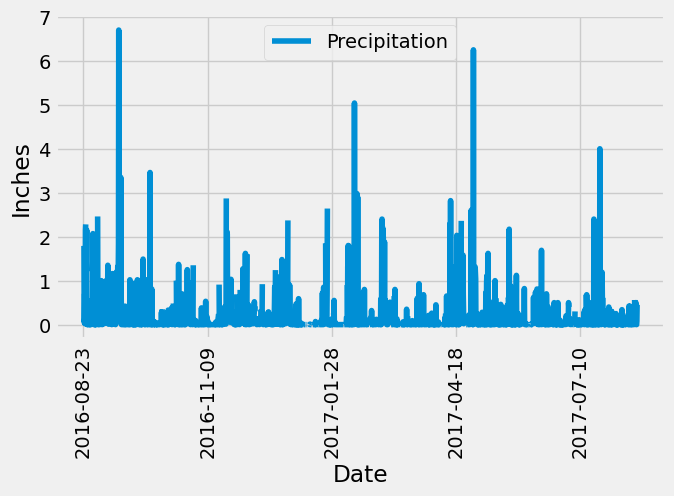

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the date and precipitation scores
last_year_query = session.query(meas.date, meas.prcp).filter(meas.date >= query_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(last_year_query, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
df = df.sort_values(by='Date')
df.set_index('Date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot=90, xlabel = 'Date', ylabel='Inches', figsize=(7,4))
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary = df.describe()
summary

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
num_of_stations = session.query(func.count(stat.name)).all()
num_of_stations

[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active = session.query(meas.station, func.count(meas.station)).group_by(meas.station).order_by(func.count(meas.station).desc()).all()
most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.min(meas.tobs), func.max(meas.tobs), func.avg(meas.tobs)]
session.query(*sel).filter(meas.station == 'USC00519281').all()


[(54.0, 85.0, 71.66378066378067)]

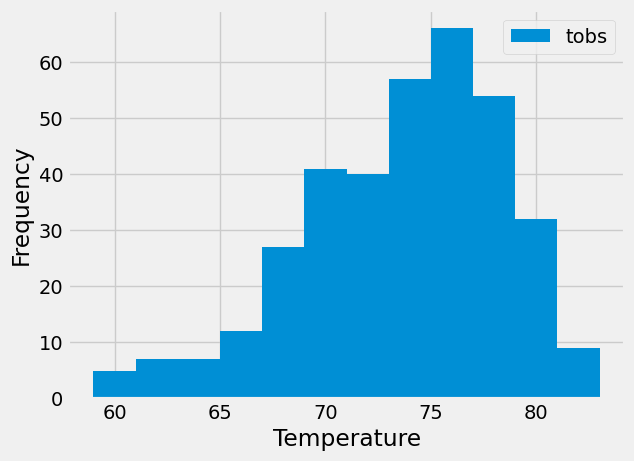

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Finds date of most recent record for most active station
actives_most_recent_date = session.query(meas.date).filter(meas.station == 'USC00519281').order_by(meas.date.desc()).first()

# Calculates the date that is 12 months before date of most recent record
active_last_12 = dt.date(2017, 8, 18) - dt.timedelta(days=365)

# Target query
active_records = session.query(meas.tobs).filter((meas.station == 'USC00519281') & (meas.date >= active_last_12)).all()

# Creating a pandas data frame from query
active_df = pd.DataFrame(active_records)

# Plotting Histogram
active_df.plot.hist(bins=12)
plt.xlabel('Temperature')
plt.show()

# Close Session

In [16]:
# Close Session
session.close()